# Problem Set 2

The entries show the blod pressures of 4 groups of adults. Groups A and B are done on the same individuals before and after treatments, groups C and D are done in two other distinct groups of adults.


In [82]:
# import libraries

import pandas as pd
import matplotlib.pyplot as plt
import math
import scipy.stats as stats
import numpy as np

In [66]:
# import csv data
data = pd.read_csv('ProblemSet2_data.csv')
data.columns


Index(['Group A', 'Group B', 'Group C', 'Group D'], dtype='object')

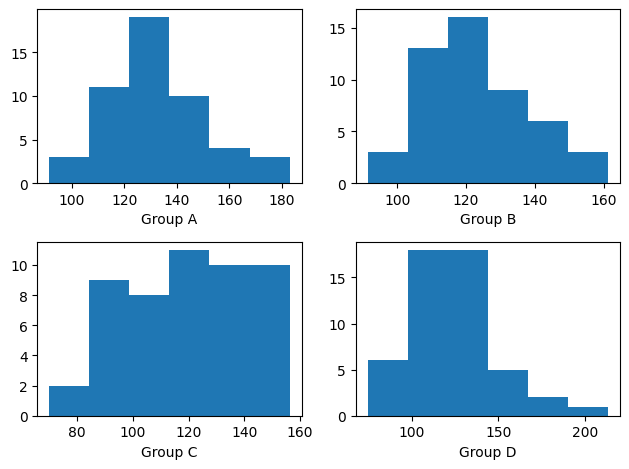

In [67]:
# Plot the histograms for all datasets 1 to 4, present the histograms in the form of a 2 by 2
# array using the subplot function in Matplotlib

num_groups = 4
bins = int(1 + math.log2(data.shape[0]))
for i in range(num_groups):
    data_name = data.columns[i]
    plt.subplot(2, 2, i + 1, xlabel=data_name)
    plt.hist(data[data_name], bins)

plt.tight_layout()



In [68]:
# Find the medians, standard deviations, and standard errors for each group

print("Medians: ")
print(data.median(), '\n')

print("Standard Deviations: ")
print(data.std(), '\n')

print("Standard Errors: ")
print(data.std()/math.sqrt(data.shape[0]), '\n')


Medians: 
Group A    129.879672
Group B    121.999935
Group C    119.756813
Group D    122.696732
dtype: float64 

Standard Deviations: 
Group A    17.589352
Group B    15.854468
Group C    22.389837
Group D    25.892003
dtype: float64 

Standard Errors: 
Group A    2.487510
Group B    2.242160
Group C    3.166401
Group D    3.661682
dtype: float64 



In [69]:
# Apply the Shapiro-Wilk test to each dataset. What can you conclude by looking at the p-values?

for i in range(num_groups):
    data_name = data.columns[i]
    statistic, pvalue = stats.shapiro(x=data[data_name])
    print(data_name, ':  (W) = ', statistic, '; pvalue = ', pvalue)

Group A :  (W) =  0.9713521775079711 ; pvalue =  0.26247751034621963
Group B :  (W) =  0.9826851716984499 ; pvalue =  0.6693372914848483
Group C :  (W) =  0.9624165335366559 ; pvalue =  0.11223889545607468
Group D :  (W) =  0.9402162574354295 ; pvalue =  0.013740752662524952


The only group that had a p vaue indicating that the test group likely did not match a normal distribution was Group D. Notably, group D also had the smallest W value, indicating it was further than normality than the other three groups.

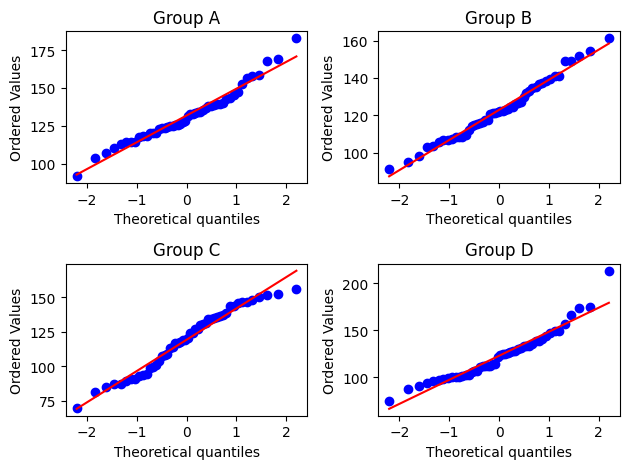

In [70]:
# Generate the QQ plot for all datasets. What can you conclude?

for i in range(num_groups):
    data_name = data.columns[i]
    plt.subplot(2, 2, i + 1)
    stats.probplot(data[data_name], plot=plt)
    plt.title(data_name)

plt.tight_layout()

Groups A and B appear to roughly match a bell shape, while group D has a positive skew. Group C fluctuates about the bell shape line.

In [71]:
# Perform the appropriate two-sample t-tests among both pairs of data sets, 
# with the null hypothesis being that the mean blood pressure of the two 
# groups are the same. What can you conclude?

tab_stats, tab_pvalue = stats.ttest_rel(data['Group A'], data['Group B'])
print("T Test for Groups A and B: Statistic = ", tab_stats, "; P Value = ", tab_pvalue)

# tcd = # t independent
tab_stats, tab_pvalue = stats.ttest_ind(data['Group C'], data['Group D'])
print("T Test for Groups C and D: Statistic = ", tab_stats, "; P Value = ", tab_pvalue)

T Test for Groups A and B: Statistic =  2.387980764209297 ; P Value =  0.0208406598477752
T Test for Groups C and D: Statistic =  -0.721209283379874 ; P Value =  0.47249783075519447


Groups A and B are statistically different distributions from each other while groups C and D show not statistically significant differences across both populations.

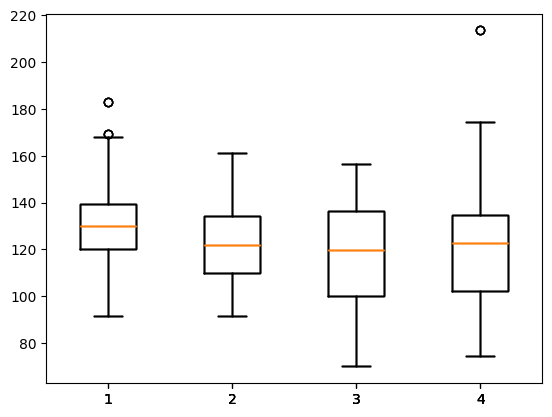

In [72]:
# show the boxplots of all 4 data sets

for i in range(num_groups):
    data_name = data.columns
    plt.boxplot(data[data_name])
    


Group A seems to have a higher average blod pressure compared to Group B, whereas groups C and D seem to have more variability and slightly different means.

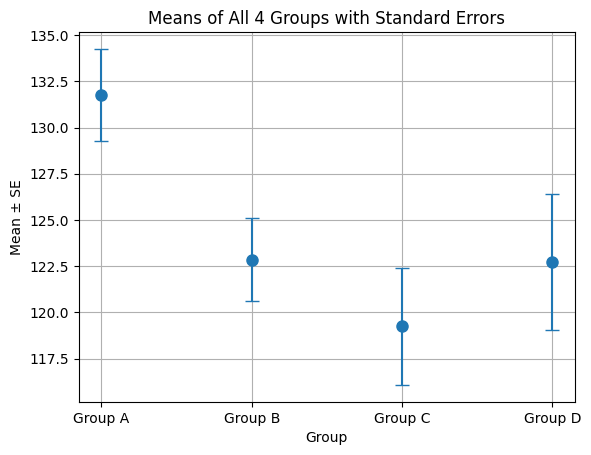

In [80]:
# # Plot the means of all 4 groups with error bars showing the standard erros
# # in a single figure. Comment on its consistency with the previous t-tests

# err = data.std() / math.sqrt(data.shape[0])
# m = data.mean()

# for i in range(num_groups):
#     col_name = data.columns[i]
#     plt.errorbar(data[col_name], m[col_name], yerr=err[col_name])

# Compute means and standard errors
m = data.mean()
err = data.std(ddof=1) / math.sqrt(data.shape[0])

# X positions for the groups
x_pos = range(num_groups)

# Plot the means with error bars
plt.figure()
plt.errorbar(x_pos, m, yerr=err, fmt='o', capsize=5, markersize=8)
plt.xticks(x_pos, data.columns)
plt.xlabel('Group')
plt.ylabel('Mean ± SE')
plt.title('Means of All 4 Groups with Standard Errors')
plt.grid(True)
plt.show()


In [ ]:
# Generate 3 random numbers uniformly from 0 to 1, and check
# whether it passes the Shapiro-Wilk test with alpha = 0.05.
# Repeat the process 9 more times and record the number of passes.
# Comment on the result

trials = 10
passes = 0

for i in range(trials):
    nums = np.random.rand(3)
    stat, pval = stats.shapiro(nums)
    if pval < 0.05:
        passes += 1


ShapiroResult(statistic=np.float64(0.7895610508618477), pvalue=np.float64(0.08981366023595816))
ShapiroResult(statistic=np.float64(0.751736924961554), pvalue=np.float64(0.0038349237998758223))
ShapiroResult(statistic=np.float64(0.9382429893483218), pvalue=np.float64(0.5203555252614052))
ShapiroResult(statistic=np.float64(0.9648475527060548), pvalue=np.float64(0.6397889547249496))
ShapiroResult(statistic=np.float64(0.8602160154807309), pvalue=np.float64(0.2681693540050778))
ShapiroResult(statistic=np.float64(0.9208537699003602), pvalue=np.float64(0.45534788821671723))
ShapiroResult(statistic=np.float64(0.993114402542849), pvalue=np.float64(0.8413383918914982))
ShapiroResult(statistic=np.float64(0.9377798149562097), pvalue=np.float64(0.5185212830458545))
ShapiroResult(statistic=np.float64(0.8755828121142047), pvalue=np.float64(0.311524149694721))
ShapiroResult(statistic=np.float64(0.994621898480048), pvalue=np.float64(0.8598135863143034))
